In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd 
df=pd.read_csv('drive/MyDrive/Datasets/healthcare-dataset-stroke-data.csv')
df.dropna(inplace=True)
del df['id'] 
del df['Residence_type'] 

y = df['stroke'].to_numpy()#target is stroke 

del df['stroke']
X = df.to_numpy()#features 

from sklearn.preprocessing import LabelEncoder
ever_marr_enc = LabelEncoder()
work_type_enc = LabelEncoder()
gender_enc = LabelEncoder()
smoke_stat_enc = LabelEncoder()

X[:,0] = gender_enc.fit_transform(X[:,0])
X[:,4] = ever_marr_enc.fit_transform(X[:,4]) #encoding categorical features 
X[:,5] = work_type_enc.fit_transform(X[:,5])
X[:,8] = smoke_stat_enc.fit_transform(X[:,8])

from sklearn.preprocessing import MinMaxScaler #normalizing the values of features 
scaler = MinMaxScaler()
#X[:,[1,6,7]] = scaler.fit_transform(X[:,[1,6,7]]) #scaling age, avg_glucose_lvl, and BMI

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
print(X)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[[1 67.0 0 ... 228.69 36.6 1]
 [1 80.0 0 ... 105.92 32.5 2]
 [0 49.0 0 ... 171.23 34.4 3]
 ...
 [0 35.0 0 ... 82.99 30.6 2]
 [1 51.0 0 ... 166.29 25.6 1]
 [0 44.0 0 ... 85.28 26.2 0]]


Feature: gender, Score: 0.00736
Feature: age, Score: 4.72955
Feature: hypertension, Score: 0.55969
Feature: heart_disease, Score: 0.46893
Feature: ever_married, Score: -0.00230
Feature: work_type, Score: -0.04620
Feature: avg_glucose_lvl, Score: 1.01778
Feature: bmi, Score: 0.01046
Feature: smoking_status, Score: 0.13101


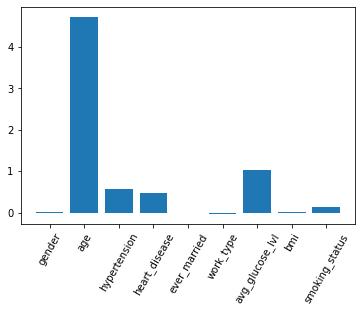

In [ ]:
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
feature_names = ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'avg_glucose_lvl', 'bmi', 'smoking_status']
model = LogisticRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %s, Score: %.5f' % (feature_names[i],v))
# plot feature importance
pyplot.bar(feature_names, importance)
pyplot.xticks(rotation=60)
pyplot.show()

Feature: gender, Score: 0.01896
Feature: age, Score: 1.54925
Feature: hypertension, Score: 0.50400
Feature: heart_disease, Score: 0.38512
Feature: ever_married, Score: -0.09288
Feature: work_type, Score: -0.06522
Feature: avg_glucose_lvl, Score: 0.20988
Feature: bmi, Score: 0.02515
Feature: smoking_status, Score: 0.14354


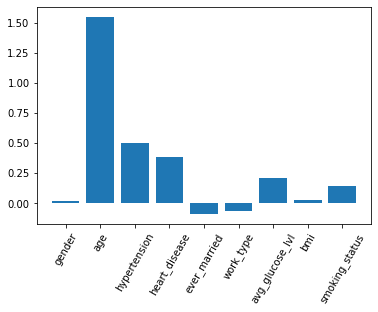

In [ ]:
# using standard scaler
from sklearn.preprocessing import StandardScaler #normalizing the values of features 
scaler = StandardScaler()
X[:,[1,6,7]] = scaler.fit_transform(X[:,[1,6,7]]) #scaling age, avg_glucose_lvl, and BMI
model = LogisticRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %s, Score: %.5f' % (feature_names[i],v))
# plot feature importance
pyplot.bar(feature_names, importance)
pyplot.xticks(rotation=60)
pyplot.show()

The '**age**' feature has highest weight in both StandardScaler and MinMaxScaler, which is correct because older people have higher chances of stroke.

However, StandardScaler assigned higher weight to **hypertension** and **heart_disease**, but MinMaxScaler has higher weight on **avg_glucose_lvl**

Feature: gender, Score: 0.04265
Feature: age, Score: 0.19366
Feature: hypertension, Score: 0.03245
Feature: heart_disease, Score: 0.02515
Feature: ever_married, Score: 0.00540
Feature: work_type, Score: 0.04255
Feature: avg_glucose_lvl, Score: 0.31033
Feature: bmi, Score: 0.26557
Feature: smoking_status, Score: 0.08223


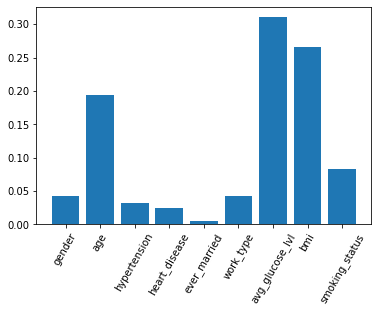

In [ ]:
#PART 2
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot
feature_names = ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'avg_glucose_lvl', 'bmi', 'smoking_status']
model = DecisionTreeClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %s, Score: %.5f' % (feature_names[i],v))
# plot feature importance
pyplot.bar(feature_names, importance)
pyplot.xticks(rotation=60)
pyplot.show()

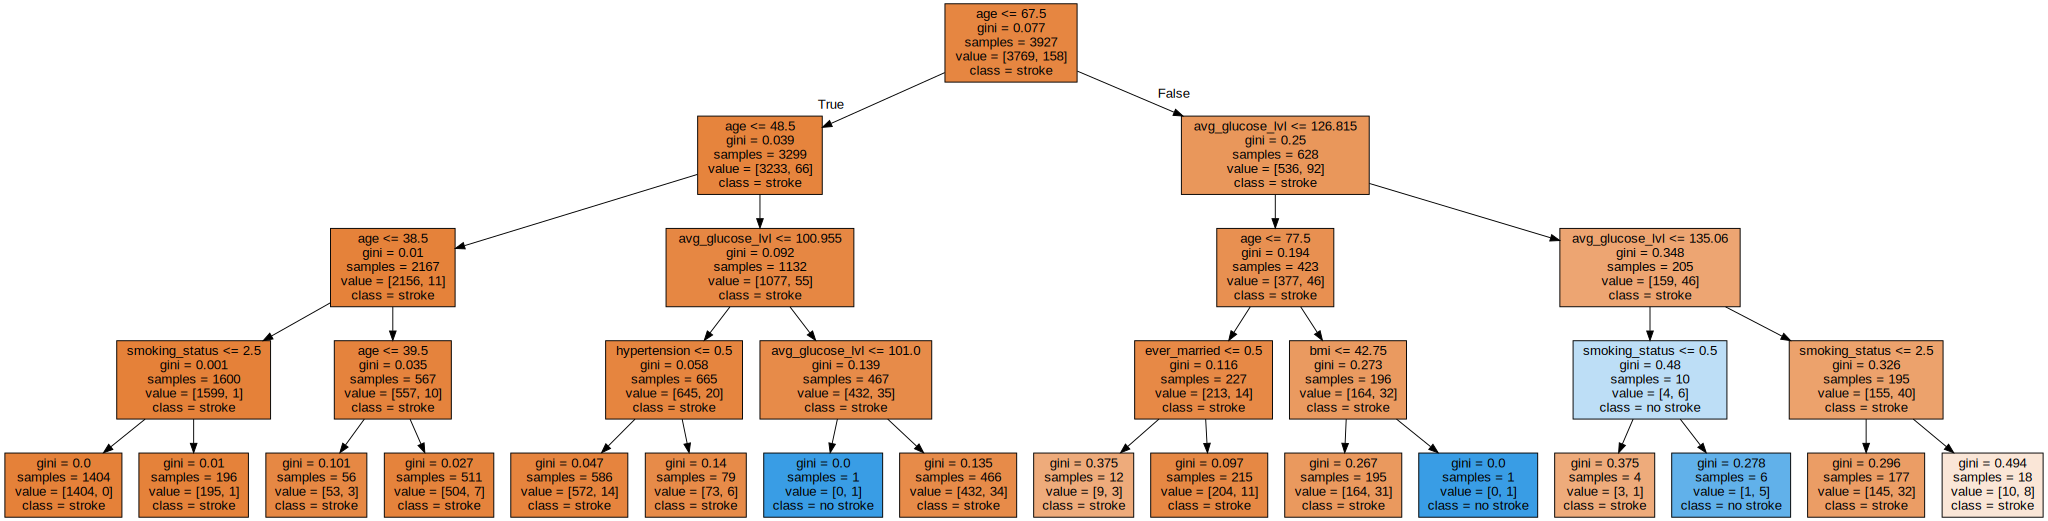

In [ ]:
from sklearn import tree
model = DecisionTreeClassifier(max_depth=4)
# fit the model
model.fit(X_train, y_train)

import graphviz
# DOT data
dot_data = tree.export_graphviz(model, out_file=None, 
                                feature_names=feature_names,  
                                class_names=['stroke', 'no stroke'],
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

PART 3:

a) In terms of feature improtance, Decision Tree has avg_glucose_lvl as highest, followed by BMI (body mass index) and age. Age was also most important feature in both logistic regressions, but BMI had zero or negative importance. Avg_glucose_lvl was low in logistic regressions. Hypertension and heart_disease have higher imporatnce in logistic regressions, but they are low in DT. For both DT and LG gender and ever_married have lowest importances.

b) The results are quite different, because using DecisionTree with small max_depth paramer had almost simmilar feature importance results as Logistic Regression. However, in 2 task I haven't set max_depth and model had probably overfited. Below is the result of feature imporatnce for Decision tree with max_depth = 4, and it has simmilar results as Logistic Regression.

Feature: gender, Score: 0.00000
Feature: age, Score: 0.64855
Feature: hypertension, Score: 0.01678
Feature: heart_disease, Score: 0.02941
Feature: ever_married, Score: 0.02688
Feature: work_type, Score: 0.00000
Feature: avg_glucose_lvl, Score: 0.14927
Feature: bmi, Score: 0.09115
Feature: smoking_status, Score: 0.03794


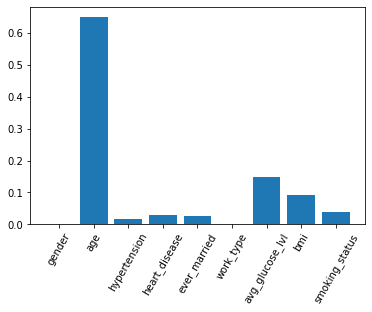

In [ ]:

from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot
feature_names = ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'avg_glucose_lvl', 'bmi', 'smoking_status']
model = DecisionTreeClassifier(max_depth =4)
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %s, Score: %.5f' % (feature_names[i],v))
# plot feature importance
pyplot.bar(feature_names, importance)
pyplot.xticks(rotation=60)
pyplot.show()